# Exploratory Data Analysis (EDA)

This notebook analyzes the dataset. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [3]:
DATA_DIR = '../data'
TRAIN_IMG_DIR = os.path.join(DATA_DIR, 'train_images')

In [6]:
plt.style.use('seaborn-v0_8')

In [7]:
# Load CSVs
df_train = pd.read_csv(os.path.join(DATA_DIR, 'train_data.csv'))
super_map = pd.read_csv(os.path.join(DATA_DIR, 'superclass_mapping.csv'), index_col='index')
sub_map = pd.read_csv(os.path.join(DATA_DIR, 'subclass_mapping.csv'), index_col='index')

In [8]:
df_train.head()

,image,superclass_index,subclass_index,description
0,0.jpg,1,37,"nature photograph of a dog, specifically a Mal..."
1,1.jpg,0,42,"nature photograph of a bird, specifically a oy..."
2,2.jpg,1,62,"nature photograph of a dog, specifically a Afg..."
3,3.jpg,1,31,"nature photograph of a dog, specifically a Shi..."
4,4.jpg,0,4,"nature photograph of a bird, specifically a gr..."


In [ ]:
# mapping names to the main dataframe
df_train['superclass_name'] = df_train['superclass_index'].map(super_map['class'])
df_train['subclass_name'] = df_train['subclass_index'].map(sub_map['class'])

print(f"Total Training Samples Count: {len(df_train)}")
df_train.head()

Total Training Samples Count: 6288


,image,superclass_index,subclass_index,description,superclass_name,subclass_name
0,0.jpg,1,37,"nature photograph of a dog, specifically a Mal...",dog,"Maltese dog, Maltese terrier, Maltese"
1,1.jpg,0,42,"nature photograph of a bird, specifically a oy...",bird,"oystercatcher, oyster catcher"
2,2.jpg,1,62,"nature photograph of a dog, specifically a Afg...",dog,"Afghan hound, Afghan"
3,3.jpg,1,31,"nature photograph of a dog, specifically a Shi...",dog,Shih-Tzu
4,4.jpg,0,4,"nature photograph of a bird, specifically a gr...",bird,"great grey owl, great gray owl, Strix nebulosa"


## 2. Class Distribution Analysis

### Super-class Balance
Understanding bias towards Dogs, Birds, or Reptiles

/var/folders/tb/0c84s3mx43z9m4zk069kxpph0000gn/T/ipykernel_2615/1214493448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='superclass_name', data=df_train, palette='viridis', order=df_train['superclass_name'].value_counts().index)


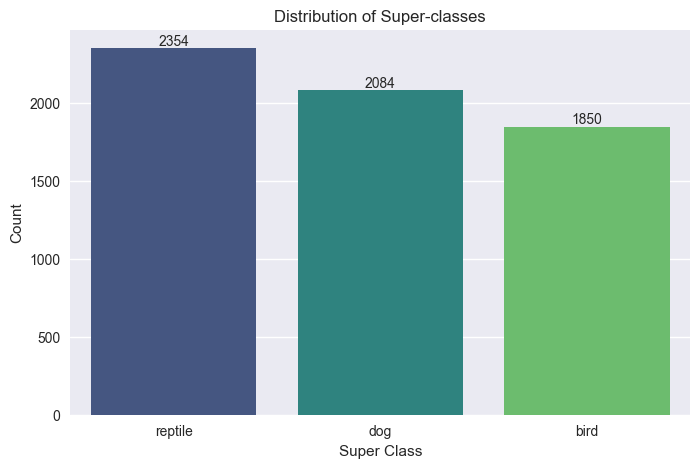

In [10]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='superclass_name', data=df_train, palette='viridis', order=df_train['superclass_name'].value_counts().index)
plt.title('Distribution of Super-classes')
plt.xlabel('Super Class')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Sub-class Balance
Distribution of specific breeds/types within each superclass

/var/folders/tb/0c84s3mx43z9m4zk069kxpph0000gn/T/ipykernel_2615/3313645549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.values, y=top_n.index, palette='crest')


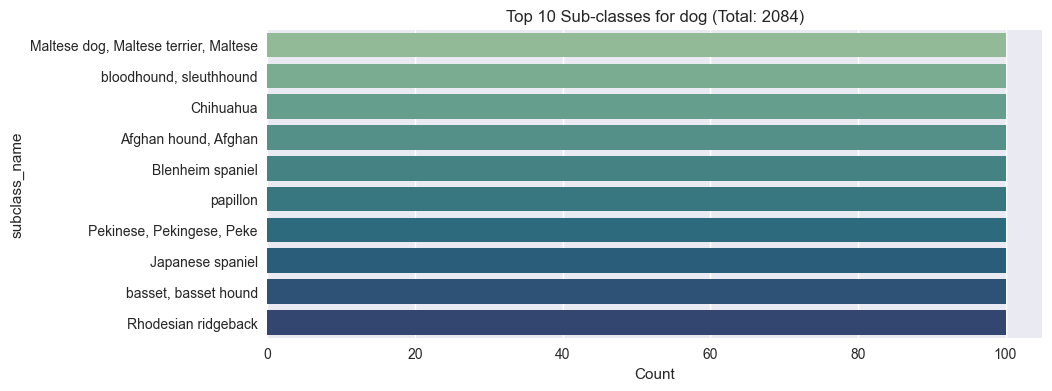

/var/folders/tb/0c84s3mx43z9m4zk069kxpph0000gn/T/ipykernel_2615/3313645549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.values, y=top_n.index, palette='crest')


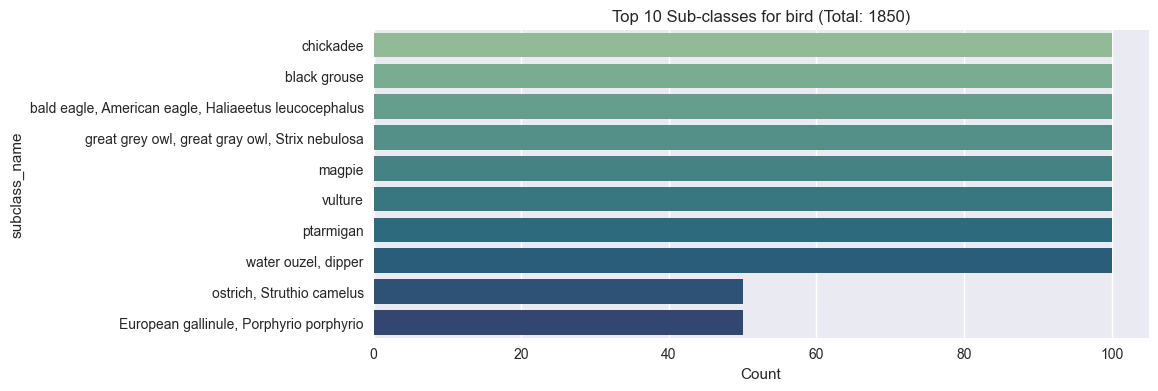

/var/folders/tb/0c84s3mx43z9m4zk069kxpph0000gn/T/ipykernel_2615/3313645549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.values, y=top_n.index, palette='crest')


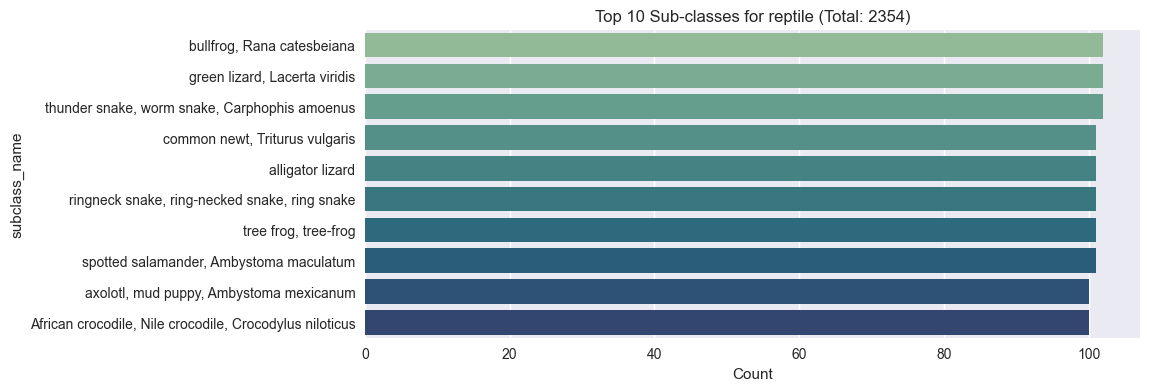

In [15]:
def plot_subclass_dist(superclass_name):
    subset = df_train[df_train['superclass_name'] == superclass_name]
    top_n = subset['subclass_name'].value_counts().head(10)
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_n.values, y=top_n.index, palette='crest')
    plt.title(f'Top 10 Sub-classes for {superclass_name} (Total: {len(subset)})')
    plt.xlabel('Count')
    plt.show()

for s_class in df_train['superclass_name'].unique():
    plot_subclass_dist(s_class)

## 3. Image Quality Visualization
Images for each sample

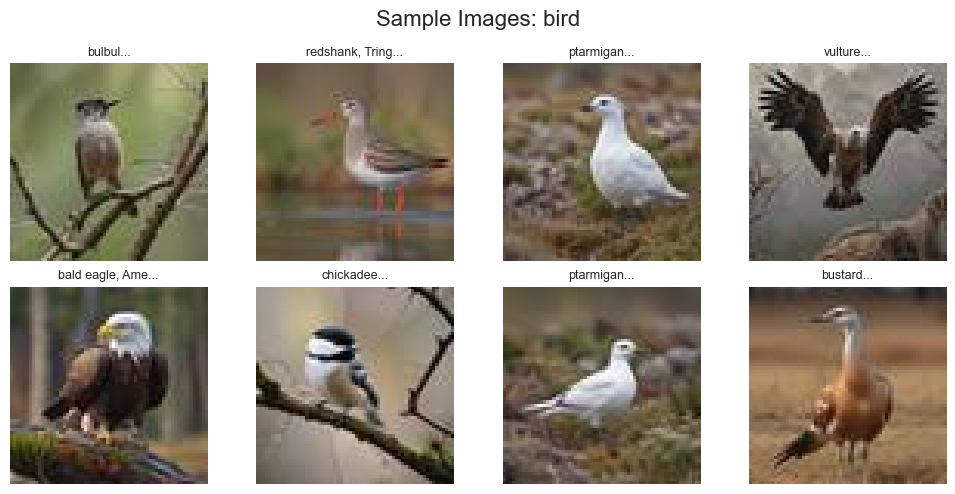

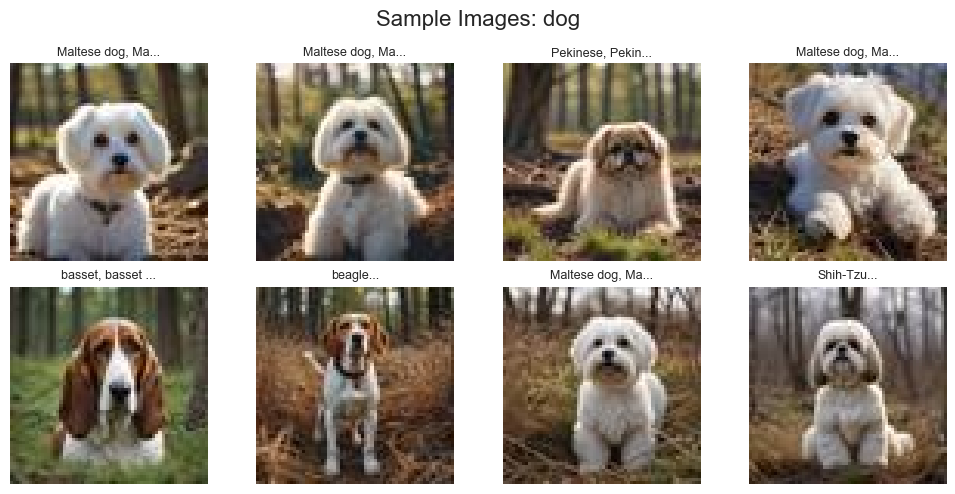

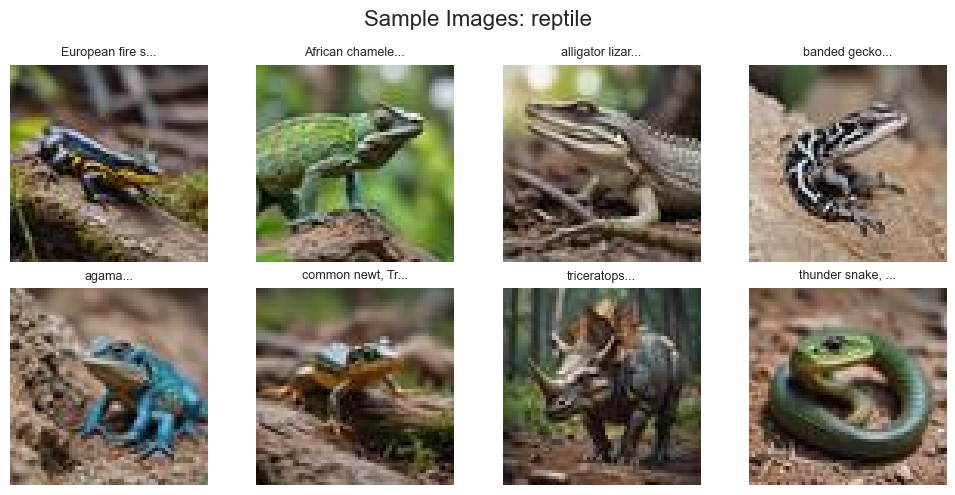

In [16]:
def show_grid(superclass_name, rows=2, cols=4):
    subset = df_train[df_train['superclass_name'] == superclass_name].sample(rows * cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2.5, rows*2.5))
    fig.suptitle(f'Sample Images: {superclass_name}', fontsize=16)
    
    for i, (idx, row) in enumerate(subset.iterrows()):
        img_path = os.path.join(TRAIN_IMG_DIR, row['image'])
        img = Image.open(img_path)
        
        ax = axes[i // cols, i % cols]
        ax.imshow(img)
        ax.set_title(f"{row['subclass_name'][:15]}...", fontsize=9)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()


for s_class in sorted(df_train['superclass_name'].unique()):
    show_grid(s_class)

## 4. Missing Classes
Subclasses from the mapping are completely missing from the training data.

In [18]:
present_indices = set(df_train['subclass_index'].unique())
all_indices = set(sub_map.index)

missing = all_indices - present_indices
print(f"Total unique subclasses in mapping: {len(all_indices)}")
print(f"Total unique subclasses in train set: {len(present_indices)}")
print(f"Number of subclasses MISSING from training: {len(missing)}")
print(sub_map.loc[list(missing)].head(10))

Total unique subclasses in mapping: 88
Total unique subclasses in train set: 87
Number of subclasses MISSING from training: 1
       class
index       
87     novel


NOTE: Missing class is marked with novel at index 87